In [ ]:
!sudo apt install tesseract-ocr tesseract-ocr-vie

In [ ]:
!pip install pytesseract
!pip install Pillow==9.0.0

In [ ]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
# Using cascade Classifiers
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def extract_face_id_card(img_url, lang='vie'):
  ## đọc hình ảnh cccd
  img = cv2.imread(img_url)

  ## scale hình ảnh thành dạng trắng đen
  scale_percent = 100 # percent of original size #60%
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  print(img.shape)
    
  # resize image
  image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)

  # face classifier
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  faces = face_classifier.detectMultiScale(gray, 1.3, 5)
  # When no faces detected, face_classifier returns and empty tuple
  if faces is ():
      print("No faces found")

  # We iterate through our faces array and draw a rectangle
  # over each face in faces
  for (x, y, w, h) in faces:
      x = x - 25 # Padding trick to take the whole face not just Haarcascades points
      y = y - 40 # Same here...
      cv2.rectangle(image, (x, y), (x + w + 50, y + h + 70), (27, 200, 10), 2)
      print('face detection')
      cv2_imshow(image)
      cv2.waitKey(0)

  cv2.destroyAllWindows()
  # if you want to crop the face use below code
  for (x, y, width, height) in faces:
      roi = image[y:y+height, x:x+width]
      cv2.imwrite("face_cccd.png", roi)
  
  # extract text in image
  # extractedInformation = pytesseract.image_to_string(Image.open(img_url), lang=lang)
  # print(extractedInformation)

(1280, 960, 3)


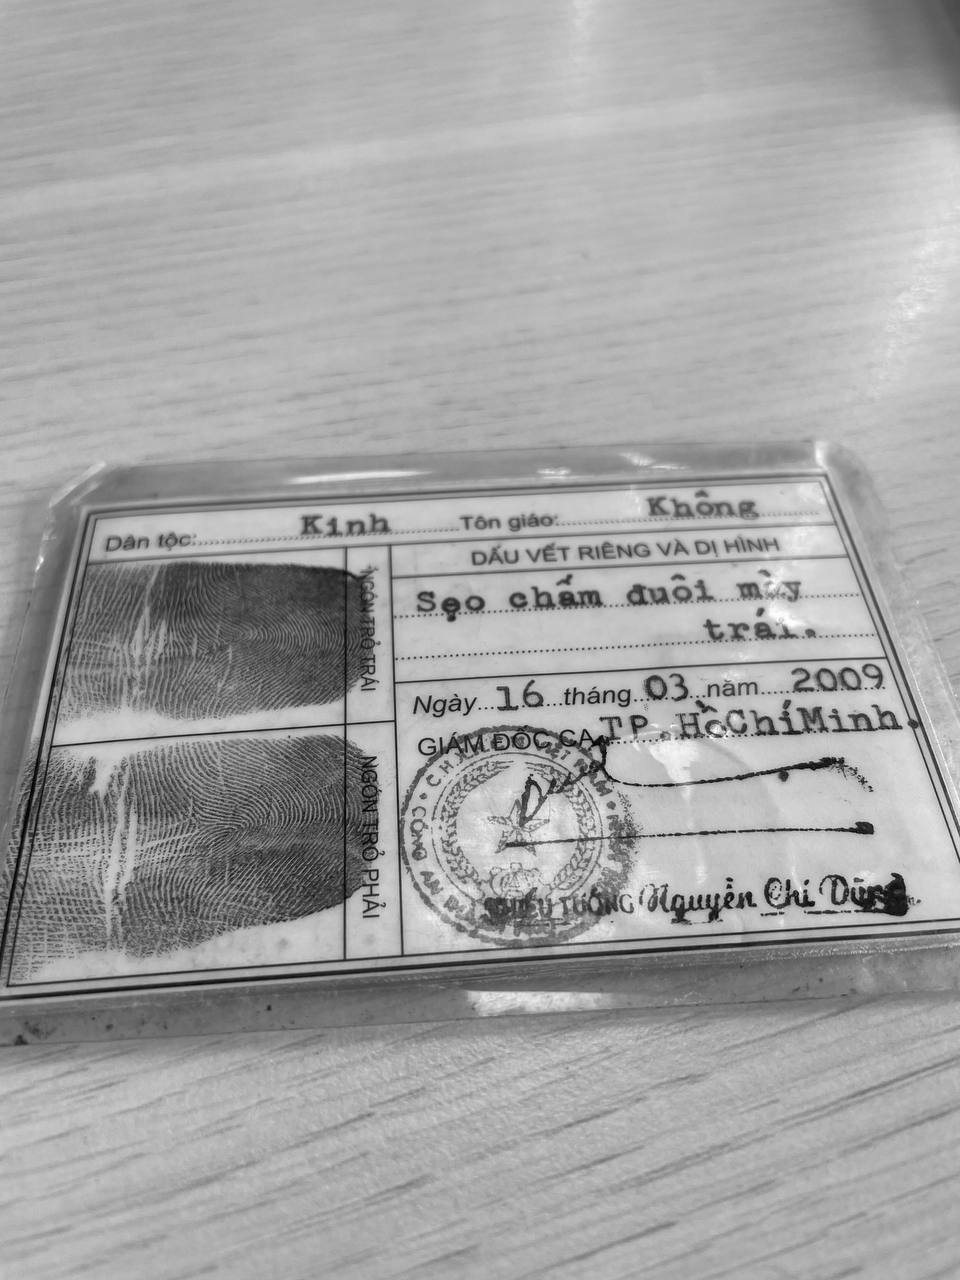

No faces found
 



In [ ]:
extract_information_id_card(img_url='2022-05-16 09.16.35.jpg', lang='vie')

In [ ]:
!pip install opencv-contrib-python
!pip install --upgrade google-cloud-vision

In [ ]:
import re
mat_truoc_cccd_moi = """VIET NAM\nCó giá trị đến:\nDate of expiry 28/12/2034\nhooo\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nSOCIALIST REPUBLIC OF VIET NAM\nIndependence - Freedom-Happiness\nBE to 1\nCĂN CƯỚC CÔNG DÂN\nCitizen Identity Card O\nSó / No.: 079094017510\nHọ và tên I Full name:\nĐỖ ANH TUẤN\nNgày sinh I Date of birth:\nGiới tính / Sex: Nam\n28/12/1994\nQuốc tịch I Nationality: Việt Nam\nQuê quán I Place of origin:\nMỹ Hạnh Nam, Đức Hòa, Long An\nNơi thường trú / Place of residence:96/17 Lê-T-Riêng\nP. Bến Thành, Quận 1, Tp. Hồ Chí Minh\n20"""

mat_sau_cccd_moi = """Đặc điểm nhân dạng I Personal identification:\nSeo chấm ngay đuôi lông mày\nNgày, tháng, năm / Date, month, year: 13/04/2021\nCỤC TRƯỞNG CỤC CẢNH SÁT\nQUẢN LÝ HÀNH CHÍNH VỀ TRẬT TỰ XÃ HỘI\nDIRECTOR GENERAL OF THE POLICE DEPARTMENT\nFOR ADMINISTRATIVE MANAGEMENT OF SOCIAL ORDER\nGONG\n98*CU\nNgón trỏ phải\nNgón trỏ trái\nRight index finger\nBAT QUAN\nLeft index finger\nL\nPhạm Công Nguyên\nIDVNM0940175109079094017510<<9\n9412284M3412282VNM<<<<<<<<<<<8\nDO<<ANH<TUAN<<<<<<<\nAN HY"""

## VIET NAM\nCó giá trị đến:\nDate of expiry 28/12/2034\nhooo\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nSOCIALIST REPUBLIC OF VIET NAM\nIndependence - Freedom-Happiness\nBE to 1\nCĂN CƯỚC CÔNG DÂN\nCitizen Identity Card O\nSó / No.: 079094017510\nHọ và tên I Full name:\nĐỖ ANH TUẤN\nNgày sinh I Date of birth:\nGiới tính / Sex: Nam\n28/12/1994\nQuốc tịch I Nationality: Việt Nam\nQuê quán I Place of origin:\nMỹ Hạnh Nam, Đức Hòa, Long An\nNơi thường trú / Place of residence:96/17 Lê-T-Riêng\nP. Bến Thành, Quận 1, Tp. Hồ Chí Minh\n20
def extract_mat_truoc_cccd_moi(string):
  find_date_of_expiry = re.findall("Date of expiry\D+(\d+\/\d+\/\d+)", string)
  date_of_expiry_key = '"date_of_expiry_key":"Có giá trị đến / Date of expiry"'
  date_of_expiry_value = '"date_of_expiry_value":' + '"' + (find_date_of_expiry[0] if len(find_date_of_expiry) > 0 else '') + '"'

  find_id = re.findall("(\d{12})", string) ## id là số duy nhất có 12 chữ số
  id_key = '"id_key":"Số / No"'
  id_value = '"id_value":' + '"' + (find_id[0] if len(find_id) > 0 else '') + '"'

  find_full_name = re.findall("Full name\W+(.*?)\;", string)
  full_name_key = '"full_name_key":"Họ và tên / Full name"'
  full_name_value = '"full_name_value":' + '"' + (find_full_name[0] if len(find_full_name) > 0 else '') + '"'

  find_date_of_birth = re.findall("Date of birth\D+(\d+\/\d+\/\d+)", string)
  date_of_birth_key = '"date_of_birth_key":"Ngày sinh / Date of birth"'
  date_of_birth_value = '"date_of_birth_value":' + '"' + (find_date_of_birth[0] if len(find_date_of_birth) > 0 else '') + '"'

  find_gender = re.findall("Sex\W+(.*?)\;", string)
  gender_key = '"gender_key":"Giới tính / Sex"'
  gender_value = '"gender_value":' + '"' + (find_gender[0] if len(find_gender) > 0 else '') + '"'

  find_nationality = re.findall("Nationality\W+(.*?)\;", string)
  nationality_key = '"nationality_key":"Quốc tịch / Nationality"'
  nationality_value = '"nationality_value":' + '"' + (find_nationality[0] if len(find_nationality) > 0 else '') + '"'

  find_place_of_origin = re.findall("Place of origin\W+(.*?)\;", string)
  place_of_origin_key = '"place_of_origin_key":"Quê quán / Place of origin"'
  place_of_origin_value = '"place_of_origin_value":' + '"' + (find_place_of_origin[0] if len(find_place_of_origin) > 0 else '') + '"'

  find_place_of_residence = re.findall("Place of residence\W+(.*)", re.sub("\;?\d+?\s?$", "", string))
  place_of_residence_key = '"place_of_residence_key":"Nơi thường trú / Place of residence"'
  place_of_residence_value = '"place_of_residence_value":' + '"' + (re.sub(";", ", ", find_place_of_residence[0]) if len(find_place_of_residence) > 0 else '') + '"'

  info_cccd = '{' + \
                  '"type":"CCCD mới mặt trước"' + ',' + \
                  date_of_expiry_key + ',' + date_of_expiry_value + ',' + \
                  id_key + ',' + id_value + ',' + \
                  full_name_key + ',' + full_name_value + ',' + \
                  date_of_birth_key + ',' + date_of_birth_value + ',' + \
                  gender_key + ',' + gender_value + ',' + \
                  nationality_key + ',' + nationality_value + ',' + \
                  place_of_origin_key + ',' + place_of_origin_value + ',' + \
                  place_of_residence_key + ',' + place_of_residence_value + \
              '}'
  return info_cccd

## Đặc điểm nhân dạng I Personal identification:\nSeo chấm ngay đuôi lông mày\nNgày, tháng, năm / Date, month, year: 13/04/2021\nCỤC TRƯỞNG CỤC CẢNH SÁT\nQUẢN LÝ HÀNH CHÍNH VỀ TRẬT TỰ XÃ HỘI\nDIRECTOR GENERAL OF THE POLICE DEPARTMENT\nFOR ADMINISTRATIVE MANAGEMENT OF SOCIAL ORDER\nGONG\n98*CU\nNgón trỏ phải\nNgón trỏ trái\nRight index finger\nBAT QUAN\nLeft index finger\nL\nPhạm Công Nguyên\nIDVNM0940175109079094017510<<9\n9412284M3412282VNM<<<<<<<<<<<8\nDO<<ANH<TUAN<<<<<<<\nAN HY
def extract_mat_sau_cccd_moi(string):
  find_personal_identification = re.findall("identification\W+(.*?)\;Ngày", string)
  personal_identification_key = '"personal_identification_key":"Đặc điểm nhận dạng / Personal identification"'
  personal_identification_value = '"personal_identification_value":' + '"' + (find_personal_identification[0] if len(find_personal_identification) > 0 else '') + '"'
  
  find_creation_date = re.findall("year\D+(\d+\/\d+\/\d+)", string)
  creation_date_key = '"creation_date_key":"Ngày cấp / Creation date"'
  creation_date_value = '"creation_date_value":' + '"' + (find_creation_date[0] if len(find_creation_date) > 0 else '') + '"'
  
  find_place_of_creation = re.findall("year\D+\d+\/\d+\/\d+\;(.*?\;.*?)\;", string)
  place_of_creation_key = '"place_of_creation_key":"Nơi cấp / Place of creation"'
  place_of_creation_value = '"place_of_creation_value":' + '"' + (re.sub("\;", " ", find_place_of_creation[0]) if len(find_place_of_creation) > 0 else '') + '"'

  find_mrz = re.findall("(IDVNM.*?\;.*?\;.*\<)", string)
  # find_mrz = re.findall("(IDVNM.*\<)", string)
  mrz_key = '"mrz_key":"Mã MRZ / MRZ code"'
  mrz_value = '"mrz_value":' + '"' + (find_mrz[0] if len(find_mrz) > 0 else '') + '"'
  info_cccd = '{' + \
                '"type":"CCCD mới mặt sau"' + ',' + \
                personal_identification_key + ',' + personal_identification_value + ',' + \
                creation_date_key + ',' + creation_date_value + ',' + \
                place_of_creation_key + ',' + place_of_creation_value + ',' + \
                mrz_key + ',' + mrz_value + \
            '}'
  return info_cccd

## Có giá trị đến: 05/05/2030\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nCĂN CƯỚC CÔNG DÂN\n079090000555\nso:\nHọ và tên: NGUYỄN VĂN BANKERVN\nNgày, tháng, năm sinh: 02/05/1990\nGiới tính: NAM\nQuốc tịch: Việt Nam\nQuê quán. Tân Phong, Quận 7, TP Hồ Chí Minh\nNơi thường trú Chung cư Era Town, Phú Mỹ, Quận 7\nTPHổ Chí Minh\nNGÔN TRỞ TRÁI\nNOON TRO PH\n
def extract_mat_truoc_cccd_cu(string):
  find_date_of_expiry = re.findall("Có giá trị đến\D+(\d+\/\d+\/\d+)", string)
  date_of_expiry_key = '"date_of_expiry_key":"Có giá trị đến"'
  date_of_expiry_value = '"date_of_expiry_value":' + '"' + (find_date_of_expiry[0] if len(find_date_of_expiry) > 0 else '') + '"'

  find_id = re.findall("(\d{12})", string) ## id là số duy nhất có 12 chữ số
  id_key = '"id_key":"Số"'
  id_value = '"id_value":' + '"' + (find_id[0] if len(find_id) > 0 else '') + '"'

  find_full_name = re.findall("Họ và tên\W+(.*?)\;", string)
  full_name_key = '"full_name_key":"Họ và tên"'
  full_name_value = '"full_name_value":' + '"' + (find_full_name[0] if len(find_full_name) > 0 else '') + '"'

  find_date_of_birth = re.findall("năm sinh\D+(\d+\/\d+\/\d+)", string)
  date_of_birth_key = '"date_of_birth_key":"Ngày, tháng, năm sinh"'
  date_of_birth_value = '"date_of_birth_value":' + '"' + (find_date_of_birth[0] if len(find_date_of_birth) > 0 else '') + '"'

  find_gender = re.findall("Giới tính\W+(.*?)\;", string)
  gender_key = '"gender_key":"Giới tính"'
  gender_value = '"gender_value":' + '"' + (find_gender[0] if len(find_gender) > 0 else '') + '"'

  find_nationality = re.findall("Quốc tịch\W+(.*?)\;", string)
  nationality_key = '"nationality_key":"Quốc tịch"'
  nationality_value = '"nationality_value":' + '"' + (find_nationality[0] if len(find_nationality) > 0 else '') + '"'

  find_place_of_origin = re.findall("Quê quán\W+(.*?)\;", string)
  place_of_origin_key = '"place_of_origin_key":"Quê quán"'
  place_of_origin_value = '"place_of_origin_value":' + '"' + (find_place_of_origin[0] if len(find_place_of_origin) > 0 else '') + '"'

  find_place_of_residence = re.findall("Nơi thường trú\W+(.*?\;.*?)\;", string)
  place_of_residence_key = '"place_of_residence_key":"Nơi thường trú"'
  place_of_residence_value = '"place_of_residence_value":' + '"' + (re.sub("\;", ", ", find_place_of_residence[0]) if len(find_place_of_residence) > 0 else '') + '"'

  info_cccd = '{' + \
                  '"type":"CCCD cũ mặt trước"' + ',' + \
                  id_key + ',' + id_value + ',' + \
                  date_of_expiry_key + ',' + date_of_expiry_value + ',' + \
                  full_name_key + ',' + full_name_value + ',' + \
                  date_of_birth_key + ',' + date_of_birth_value + ',' + \
                  gender_key + ',' + gender_value + ',' + \
                  nationality_key + ',' + nationality_value + ',' + \
                  place_of_origin_key + ',' + place_of_origin_value + ',' + \
                  place_of_residence_key + ',' + place_of_residence_value + \
              '}'
  return info_cccd

## Đặc điểm nhận dạng: Nốt ruồi cách mi mắt\nphải 2 cm\nNgày 05 tháng 05 năm 2018\nCỤC TRƯỞNG CỤC CẢNH SÁT\nDKQL CU TRUVA LOG VÉ DAN CV\nર.\nTrần Quốc Sáng
def extract_mat_sau_cccd_cu_cmnd_moi(string):
  find_personal_identification = re.findall(r"Đặc điểm nhận dạng\W+(.*)\;Ngày", string)
  personal_identification_key = '"personal_identification_key":"Đặc điểm nhận dạng"'
  personal_identification_value = '"personal_identification_value":' + '"' + (re.sub(";", " ", find_personal_identification[0]) if len(find_personal_identification) > 0 else '') + '"'
  
  find_creation_date = re.findall("Ngày\D+(\d+)\D+tháng\D+(\d+)\D+năm\D+(\d+)\D+", string)
  creation_date_key = '"creation_date_key":"Ngày cấp / Creation date"'
  creation_date_value = '"creation_date_value":'
  if len(find_creation_date) > 0:
    creation_date_value_p1, creation_date_value_p2, creation_date_value_p3 = find_creation_date[0]
    creation_date_value = creation_date_value + '"' + creation_date_value_p1 + '/' + creation_date_value_p2 + '/' + creation_date_value_p3 + '"'
  else:
    creation_date_value = creation_date_value + '""'
  
  find_place_of_creation = re.findall("Ngày\D+\d+\D+tháng\D+\d+\D+năm\D+\d+\;(.*?\;.*?)\;", string)
  place_of_creation_key = '"place_of_creation_key":"Nơi cấp / Place of creation"'
  place_of_creation_value = '"place_of_creation_value":' + '"' + (re.sub(";", " ", find_place_of_creation[0]) if len(find_place_of_creation) > 0 else '') + '"'
  
  info_cccd = '{' + \
                '"type":"CCCD cũ mặt sau / CMND mặt sau mới"' + ',' + \
                personal_identification_key + ',' + personal_identification_value + ',' + \
                creation_date_key + ',' + creation_date_value + ',' + \
                place_of_creation_key + ',' + place_of_creation_value + \
            '}'
  return info_cccd

## CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập – Tự do - Hạnh phúc\nGIẤY CHỨNG MINH NHÂN DÂN\n024969616\nwwwww\nHọ tên:. ĐÓ ANH TUẤN\nSinh ngày..\nNguyên quán..\n28-12-1994\nLong An...\nNơi ĐKHK thường trú: 96/17 Lệ Thi\nRiêng,P.BếnThành,Q1 TP HồChíMinh
def extract_mat_truoc_cmnd_cu(string):
  find_id = re.findall("(\d{9})", string) ## id là số duy nhất có 12 chữ số
  id_key = '"id_key":"Số"'
  id_value = '"id_value":' + '"' + (find_id[0] if len(find_id) > 0 else '') + '"'

  find_full_name = re.findall("Họ tên\W+(.*?)\;", string)
  full_name_key = '"full_name_key":"Họ tên"'
  full_name_value = '"full_name_value":' + '"' + (find_full_name[0] if len(find_full_name) > 0 else '') + '"'

  find_date_of_birth = re.findall("(\d\d\D\d\d\D\d\d\d\d)", string)
  # print(find_date_of_birth)
  date_of_birth_key = '"date_of_birth_key":"Sinh ngày"'
  date_of_birth_value = '"date_of_birth_value":' + '"' + (find_date_of_birth[0] if len(find_date_of_birth) > 0 else '') + '"'

  find_place_of_origin = re.findall("Nguyên quán\W+(.*?)\;", re.sub("\.|\d+", "", string))
  place_of_origin_key = '"place_of_origin_key":"Nguyên quán"'
  place_of_origin_value = '"place_of_origin_value":' + '"' + (find_place_of_origin[0] if len(find_place_of_origin) > 0 else '') + '"'

  find_place_of_residence = re.findall("Nơi ĐKHK thường trú\W+(.*)", string)
  place_of_residence_key = '"place_of_residence_key":"Nơi ĐKHK thường trú"'
  place_of_residence_value = '"place_of_residence_value":' + '"' + (re.sub(";", " ", find_place_of_residence[0]) if len(find_place_of_residence) > 0 else '') + '"'

  info_cccd = '{' + \
                  '"type":"CMND cũ mặt trước"' + ',' + \
                  id_key + ',' + id_value + ',' + \
                  full_name_key + ',' + full_name_value + ',' + \
                  date_of_birth_key + ',' + date_of_birth_value + ',' + \
                  place_of_origin_key + ',' + place_of_origin_value + ',' + \
                  place_of_residence_key + ',' + place_of_residence_value + \
              '}'
  return info_cccd

## e\n(P\n91\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nCHỨNG MINH NHÂN DÂN\nSố:001089000098\nHọ và tên khai sinh:\nNGÔ NGỌC THIẾT\nHọ và tên gọi khác:\nNgày, tháng, năm sinh:09/12/1989\nGiới tính: Nam\nDân tộc: Kinh\nQuê quán: Tả Thanh Oai, Thanh Trì, Hà Nội\nNơi thưởng trú: Đội 1, Tả Thanh Oai, Thanh T\nHà Nội\n5 giá trị đến:09/12/2028
def extract_mat_truoc_cmnd_moi(string):
  find_date_of_expiry = re.findall("giá trị đến\D+(\d+\/\d+\/\d+)", string)
  date_of_expiry_key = '"date_of_expiry_key":"Có giá trị đến"'
  date_of_expiry_value = '"date_of_expiry_value":' + '"' + (find_date_of_expiry[0] if len(find_date_of_expiry) > 0 else '') + '"'

  find_id = re.findall("(\d{12})", string) ## id là số duy nhất có 12 chữ số
  id_key = '"id_key":"Số"'
  id_value = '"id_value":' + '"' + (find_id[0] if len(find_id) > 0 else '') + '"'

  find_full_name = re.findall("khai sinh\W+(.*?)\;", string)
  full_name_key = '"full_name_key":"Họ và tên khai sinh"'
  full_name_value = '"full_name_value":' + '"' + (find_full_name[0] if len(find_full_name) > 0 else '') + '"'

  find_date_of_birth = re.findall("năm sinh\D+(\d+\/\d+\/\d+)", string)
  date_of_birth_key = '"date_of_birth_key":"Ngày, tháng, năm sinh"'
  date_of_birth_value = '"date_of_birth_value":' + '"' + (find_date_of_birth[0] if len(find_date_of_birth) > 0 else '') + '"'

  find_gender = re.findall("Giới tính\W+(.*?)\;", string)
  gender_key = '"gender_key":"Giới tính"'
  gender_value = '"gender_value":' + '"' + (find_gender[0] if len(find_gender) > 0 else '') + '"'

  find_ethnicity = re.findall("Dân tộc\W+(.*?)\;", string)
  ethnicity_key = '"ethnicity_key":"Dân tộc"'
  ethnicity_value = '"ethnicity_value":' + '"' + (find_ethnicity[0] if len(find_ethnicity) > 0 else '') + '"'

  find_place_of_origin = re.findall("Quê quán\W+(.*?)\;", string)
  place_of_origin_key = '"place_of_origin_key":"Quê quán"'
  place_of_origin_value = '"place_of_origin_value":' + '"' + (find_place_of_origin[0] if len(find_place_of_origin) > 0 else '') + '"'

  find_place_of_residence = re.findall("trú\W+(.*\;.*?)\;", string)
  place_of_residence_key = '"place_of_residence_key":"Nơi thường trú"'
  place_of_residence_value = '"place_of_residence_value":' + '"' + (re.sub("\;", ", ", find_place_of_residence[0]) if len(find_place_of_residence) > 0 else '') + '"'
  info_cccd = '{' + \
                  '"type":"CMND mới mặt trước"' + ',' + \
                  id_key + ',' + id_value + ',' + \
                  date_of_expiry_key + ',' + date_of_expiry_value + ',' + \
                  full_name_key + ',' + full_name_value + ',' + \
                  date_of_birth_key + ',' + date_of_birth_value + ',' + \
                  gender_key + ',' + gender_value + ',' + \
                  ethnicity_key + ',' + ethnicity_value + ',' + \
                  place_of_origin_key + ',' + place_of_origin_value + ',' + \
                  place_of_residence_key + ',' + place_of_residence_value + \
              '}'
  return info_cccd

def extract_mat_sau_cmnd_cu(string):
  find_ethnicity = re.findall("Dân tộc\W+(.*?)\;", string)
  ethnicity_key = '"ethnicity_key":"Dân tộc"'
  ethnicity_value = '"ethnicity_value":' + '"' + (find_ethnicity[0] if len(find_ethnicity) > 0 else '') + '"'
  
  find_religion = re.findall("Tôn giáo\W+(.*?)\;", string)
  religion_key = '"religion_key":"Tôn giáo"'
  religion_value = '"religion_value":' + '"' + (find_religion[0] if len(find_religion) > 0 else '') + '"'

  find_personal_identification = re.findall(r"DẤU VẾT RIÊNG VÀ DỊ HÌNH\W+(.*)\;Ngày", string)
  personal_identification_key = '"personal_identification_key":"DẤU VẾT RIÊNG VÀ DỊ HÌNH"'
  personal_identification_value = '"personal_identification_value":' + '"' + (re.sub(";", " ", find_personal_identification[0]) if len(find_personal_identification) > 0 else '') + '"'

  find_creation_date = re.findall("Ngày\D+(\d+)\D+tháng\D+(\d+)\D+năm\D+(\d+)\D+", string)
  creation_date_key = '"creation_date_key":"Ngày cấp"'
  creation_date_value = '"creation_date_value":'
  if len(find_creation_date) > 0:
    creation_date_value_p1, creation_date_value_p2, creation_date_value_p3 = find_creation_date[0]
    creation_date_value = creation_date_value + '"' + creation_date_value_p1 + '/' + creation_date_value_p2 + '/' + creation_date_value_p3 + '"'
  else:
    creation_date_value = creation_date_value + '""'
  
  find_place_of_creation = re.findall("ĐỐC CA(.*?)\;", string)
  place_of_creation_key = '"place_of_creation_key":"Nơi cấp"'
  place_of_creation_value = '"place_of_creation_value":' + '"' + 'GIÁM ĐỐC CA ' + (find_place_of_creation[0] if len(find_place_of_creation) > 0 else '') + '"'
  
  info_cccd = '{' + \
                '"type":"CMND cũ mặt sau"' + ',' + \
                ethnicity_key + ',' + ethnicity_value + ',' + \
                religion_key + ',' + religion_value + ',' + \
                personal_identification_key + ',' + personal_identification_value + ',' + \
                creation_date_key + ',' + creation_date_value + ',' + \
                place_of_creation_key + ',' + place_of_creation_value + \
            '}'
  return info_cccd

mat_truoc_cccd_cu = """Có giá trị đến: 05/05/2030\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nCĂN CƯỚC CÔNG DÂN\n079090000555\nso:\nHọ và tên: NGUYỄN VĂN BANKERVN\nNgày, tháng, năm sinh: 02/05/1990\nGiới tính: NAM\nQuốc tịch: Việt Nam\nQuê quán. Tân Phong, Quận 7, TP Hồ Chí Minh\nNơi thường trú Chung cư Era Town, Phú Mỹ, Quận 7\nTPHổ Chí Minh\nNGÔN TRỞ TRÁI\nNOON TRO PH\n"""
mat_sau_cccd_cu = """Đặc điểm nhận dạng: Nốt ruồi cách mi mắt\nphải 2 cm\nNgày 05 tháng 05 năm 2018\nCỤC TRƯỞNG CỤC CẢNH SÁT\nDKQL CU TRUVA LOG VÉ DAN CV\nર.\nTrần Quốc Sáng"""
mat_truoc_cmnd_cu = """CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập – Tự do - Hạnh phúc\nGIẤY CHỨNG MINH NHÂN DÂN\n024969616\nwwwww\nHọ tên:. ĐÓ ANH TUẤN\nSinh ngày..\nNguyên quán..\n28-12-1994\nLong An...\nNơi ĐKHK thường trú: 96/17 Lệ Thi\nRiêng,P.BếnThành,Q1 TP HồChíMinh"""
mat_truoc_cmnd_moi = """e\n(P\n91\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nCHỨNG MINH NHÂN DÂN\nSố:001089000098\nHọ và tên khai sinh:\nNGÔ NGỌC THIẾT\nHọ và tên gọi khác:\nNgày, tháng, năm sinh:09/12/1989\nGiới tính: Nam\nDân tộc: Kinh\nQuê quán: Tả Thanh Oai, Thanh Trì, Hà Nội\nNơi thưởng trú: Đội 1, Tả Thanh Oai, Thanh T\nHà Nội\n5 giá trị đến:09/12/2028"""
mat_sau_cmnd_cu = """Dân tộc Kinh\nNTRỎ TRÁI\nTôn giáo...\nKhông\nDẤU VẾT RIÊNG VÀ DỊ HÌNH\nSeo chấm đuôn ma\ntrá.\nNgày\nGIÁM\n16 tháng 03 năm 2009\nĐỐC CATP HồChíMinh\nHEY THONG Nguyen Chi Dun\n41\nD.com\nNGÓN TRỎ PHẢI"""
mat_sau_cmnd_moi = """NGÔN TRÒ TRÁI\nNGÓN TRÒ PHẢI\nĐặc điểm nhân dạng: Nốt ruồi c,1cm trên sau đuổi\nmắt phải\nNgày 23 tháng 11 năm 2015\nCỤC TRƯỞNG CỤC CẢNH SÁT\nĐKQL CƯ TRÚ VÀ DLQG VỀ DÂN CƯ\n20\nWOL\nVũ Xuân Dung\n6X41"""
## lấy thông tin từ cccd mặt trước / mặt sau, không lấy cùng lúc cả 2
def extract_info_id_card(string):
  string = re.sub("\n", ";", string)

  ####################################### Căn cước công dân cũ / mới ######################################
  ## check xem có phải là CCCD mặt trước không
  check_cccd_mat_truoc = (bool(re.search("CĂN CƯỚC CÔNG DÂN", string)))

  ## check xem loại CCCD mặt trước mới / cũ
  check_cccd_mat_truoc_moi = (bool(re.search("Citizen Identity Card", string)))

  ## nếu có chữ CĂN CƯỚC CÔNG DÂN và Citizen Identity Card gọi là CCCD mới
  if check_cccd_mat_truoc == True and check_cccd_mat_truoc_moi == True:
    print('cccd mặt trước mới')
    ## gọi hàm tách mặt trước cccd mới, trả về JSON
    return extract_mat_truoc_cccd_moi(string)

  ## nếu có chữ CĂN CƯỚC CÔNG DÂN và không có chữ Citizen Identity Card gọi là CCCD cũ
  if check_cccd_mat_truoc == True and check_cccd_mat_truoc_moi == False:
    print('cccd mặt trước cũ')
    ## gọi hàm tách mặt trước cccd cũ, trả về JSON
    return extract_mat_truoc_cccd_cu(string)

  check_cccd_mat_sau = (bool(re.search("Đặc điểm", string)))
  check_cccd_mat_sau_moi = (bool(re.search("Personal identification", string)))

  ## nếu có chữ Đặc điểm và Personal identification là CCCD mặt sau mới
  if check_cccd_mat_sau == True and check_cccd_mat_sau_moi == True:
    print('cccd mặt sau mới')
    return extract_mat_sau_cccd_moi(string)
  
  ## nếu có chữ Đặc điểm và không có chữ Personal identification là CCCD mặt sau cũ
  if check_cccd_mat_sau == True and check_cccd_mat_sau_moi == False:
    print('cccd mặt sau cũ / cmnd mặt sau mới')
    return extract_mat_sau_cccd_cu_cmnd_moi(string)

  ###################################### Chứng minh nhân dân cũ / mới ######################################
  ############################################### Mặt trước ################################################
  check_cmnd_cu_mat_truoc = (bool(re.search("GIẤY CHỨNG MINH NHÂN DÂN", string)))
  check_cmnd_moi_mat_truoc = (bool(re.search("CHỨNG MINH NHÂN DÂN", string)))

  ## """CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập – Tự do - Hạnh phúc\nGIẤY CHỨNG MINH NHÂN DÂN\n024969616\nwwwww\nHọ tên:. ĐÓ ANH TUẤN\nSinh ngày..\nNguyên quán..\n28-12-1994\nLong An...\nNơi ĐKHK thường trú: 96/17 Lệ Thi\nRiêng,P.BếnThành,Q1 TP HồChíMinh"""
  ## nếu có chữ GIẤY CHỨNG MINH NHÂN DÂN là cmnd cũ mặt trước
  if check_cmnd_cu_mat_truoc == True:
    print('cmnd mặt trước cũ')
    return extract_mat_truoc_cmnd_cu(string)

  ## e\n(P\n91\nCỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM\nĐộc lập - Tự do - Hạnh phúc\nCHỨNG MINH NHÂN DÂN\nSố:001089000098\nHọ và tên khai sinh:\nNGÔ NGỌC THIẾT\nHọ và tên gọi khác:\nNgày, tháng, năm sinh:09/12/1989\nGiới tính: Nam\nDân tộc: Kinh\nQuê quán: Tả Thanh Oai, Thanh Trì, Hà Nội\nNơi thưởng trú: Đội 1, Tả Thanh Oai, Thanh T\nHà Nội\n5 giá trị đến:09/12/2028
  if check_cmnd_cu_mat_truoc == False and check_cmnd_moi_mat_truoc == True:
    print('cmnd mặt trước mới')
    return extract_mat_truoc_cmnd_moi(string)

  ## Dân tộc Kinh\nNTRỎ TRÁI\nTôn giáo...\nKhông\nDẤU VẾT RIÊNG VÀ DỊ HÌNH\nSeo chấm đuôn ma\ntrá.\nNgày\nGIÁM\n16 tháng 03 năm 2009\nĐỐC CATP HồChíMinh\nHEY THONG Nguyen Chi Dun\n41\nD.com\nNGÓN TRỎ PHẢI
  ################################################ Mặt sau ################################################
  check_cmnd_cu_mat_sau = (bool(re.search("DẤU VẾT RIÊNG VÀ DỊ HÌNH", string)))
  if check_cmnd_cu_mat_sau == True:
    print('cmnd mặt sau cũ')
    return extract_mat_sau_cmnd_cu(string)
  ## cmnd mặt sau mới giống 100% cccd mặt sau cũ

# print(cccd(text_mat_truoc))
cccd(mat_sau_cmnd_moi)

cccd mặt sau cũ


'{"type":"CCCD cũ mặt sau","personal_identification_key":"Đặc điểm nhận dạng","personal_identification_value":"","creation_date_key":"Ngày cấp / Creation date","creation_date_value":"23/11/2015","place_of_creation_key":"Nơi cấp / Place of creation","place_of_creation_value":"CỤC TRƯỞNG CỤC CẢNH SÁT ĐKQL CƯ TRÚ VÀ DLQG VỀ DÂN CƯ"}'